In [1]:
# Load Libraries

In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel

In [8]:
import pandas as pd
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [4]:
# Chi Square feature selection
churn_df = pd.read_csv('star_classification.csv')
label_encoder = LabelEncoder()
churn_df['class'] = label_encoder.fit_transform(churn_df['class'])
X = churn_df.drop('class',axis=1)
Y = churn_df['class']
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 6)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
print(X.columns)

C:\Users\visha\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Num Features: 6
Selected Features: [ True False False False False False False False  True  True False False
  True False False  True  True]
Feature Ranking: [ 1  3 10  5  6  7  8  9  1  1 12  2  1 11  4  1  1]
Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'plate',
       'MJD', 'fiber_ID'],
      dtype='object')


In [15]:
data = pd.read_csv('Skyserver_12_30_2019 4_49_58 PM.csv')
data.describe()

objid             ra            dec              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237663e+18     177.512888      25.052056      18.637915   
std    7.264931e+12      78.039070      20.567259       0.832284   
min    1.237646e+18       0.013061     -19.495456      10.611810   
25%    1.237658e+18     136.356526       6.770380      18.212902   
50%    1.237662e+18     180.411688      23.918611      18.873250   
75%    1.237667e+18     224.369107      40.344539      19.273302   
max    1.237681e+18     359.999615      84.490494      19.599950   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       17.407128      16.881676      16.625534      16.467087   
std         0.985921       1.133337       1.209532       1.281788   
min         9.668339       9.005167       8.848403       8.947795   
25%        16.852982      16.196607      15.865275      15.619960   
50%        17.515860      16.890640      16.599885      16.428385   
75%        18.056060      17.585750      17.344912      17.234625   
max        19.996050      31.990100      32.141470      29.383740   

                 run     rerun         camcol          field     specobjid  \
count  100000.000000  100000.0  100000.000000  100000.000000  1.000000e+05   
mean     3978.727640     301.0       3.274010     187.243080  2.913905e+18   
std      1691.498597       0.0       1.621208     141.037298  2.488872e+18   
min       109.000000     301.0       1.000000      11.000000  2.994897e+17   
25%      2826.000000     301.0       2.000000      85.000000  1.335426e+18   
50%      3900.000000     301.0       3.000000     153.000000  2.354330e+18   
75%      5061.000000     301.0       5.000000     249.000000  3.276384e+18   
max      8162.000000     301.0       6.000000     982.000000  1.317645e+19   

            redshift          plate            mjd        fiberid  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean        0.170621    2587.984270   53913.908690     341.699080  
std         0.437571    2210.547391    1547.244489     217.068614  
min        -0.004136     266.000000   51608.000000       1.000000  
25%         0.000001    1186.000000   52733.000000     160.000000  
50%         0.045997    2091.000000   53726.000000     328.000000  
75%         0.095429    2910.000000   54585.000000     502.000000  
max         7.011245   11703.000000   58543.000000    1000.000000

In [16]:
sns.set_theme(style="whitegrid")
sns.set_style('ticks') 
data.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [17]:
data.drop(['objid', 'ra', 'dec', 'run', 'rerun', 'camcol', 'field', 'specobjid', 'plate','mjd','fiberid'], inplace = True, axis = 1)
data['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

In [12]:
# Analysis of Data

In [13]:
data['class'] = data['class'].replace(['GALAXY'], 'NQSO')
data['class'] = data['class'].replace(['STAR'], 'NQSO')

In [18]:
data_resample = data
data_resample.columns
data_resample

u         g         r         i         z   class  redshift
0      18.69254  17.13867  16.55555  16.34662  16.17639    STAR  0.000115
1      18.47633  17.30546  17.24116  17.32780  17.37114    STAR -0.000093
2      16.47714  15.31072  15.55971  15.72207  15.82471    STAR  0.000165
3      18.63561  16.88346  16.09825  15.70987  15.43491  GALAXY  0.058155
4      18.88325  17.87948  17.47037  17.17441  17.05235  GALAXY  0.072210
...         ...       ...       ...       ...       ...     ...       ...
99995  19.32631  18.82748  18.65659  18.60481  18.60917     QSO  0.438182
99996  18.33687  17.30365  17.16037  17.14895  17.14419    STAR -0.000497
99997  17.50690  15.63152  15.22328  15.04469  15.28668  GALAXY  0.004587
99998  19.33946  17.21436  16.29697  15.86745  15.51556  GALAXY  0.084538
99999  18.11769  16.86279  16.31057  16.07582  15.94701    STAR -0.000085

[100000 rows x 7 columns]

Text(0.5, 1.0, 'Records per class')

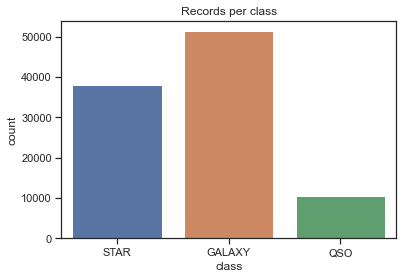

In [20]:
ax = sns.countplot(x="class", data=data_resample)
ax.set_title('Records per class')

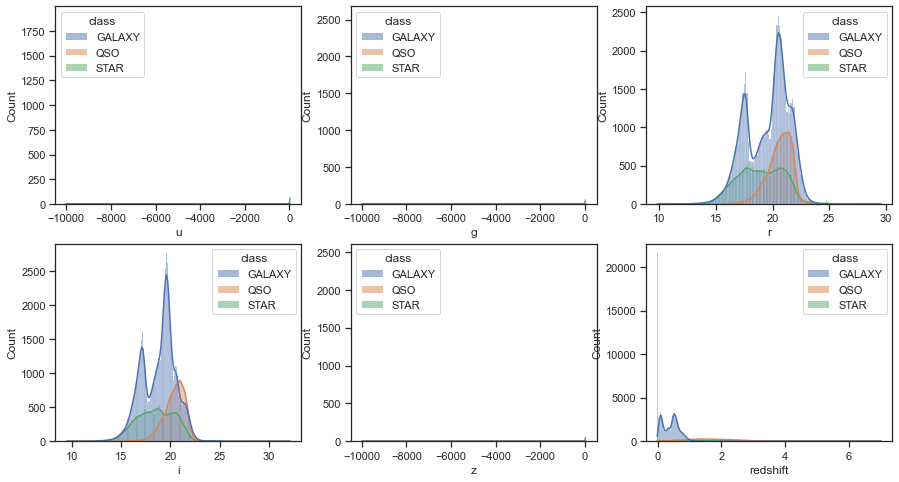

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

sns.histplot(data=data_resample, x="u", hue="class", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=data_resample, x="g", hue="class", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=data_resample, x="r", hue="class", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=data_resample, x="i", hue="class", kde=True, color="teal", ax=axs[1, 0])
sns.histplot(data=data_resample, x="z", hue="class", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=data_resample, x="redshift", hue="class", kde=True, color="teal", ax=axs[1, 2])
plt.show()

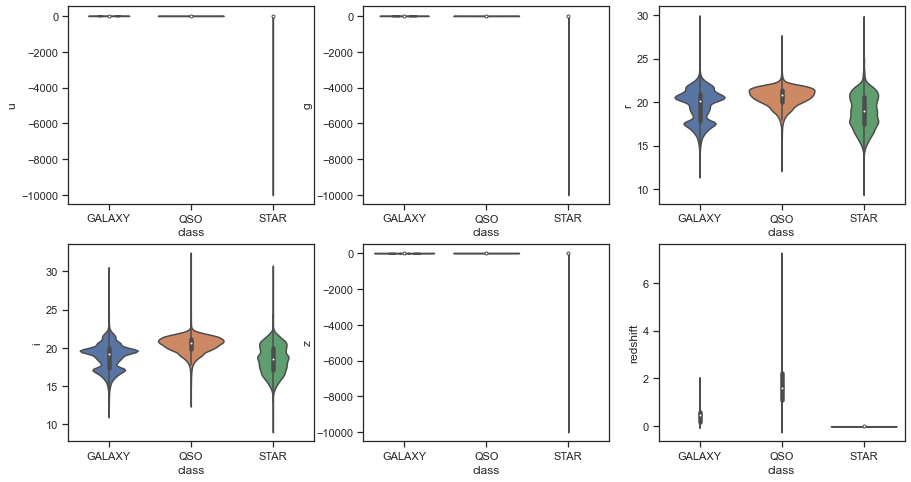

In [14]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

sns.violinplot(x="class", y="u", data=data_resample, ax=axs[0, 0])
sns.violinplot(x="class", y="g", data=data_resample, ax=axs[0, 1])
sns.violinplot(x="class", y="r", data=data_resample, ax=axs[0, 2])
sns.violinplot(x="class", y="i", data=data_resample, ax=axs[1, 0])
sns.violinplot(x="class", y="z", data=data_resample, ax=axs[1, 1])
sns.violinplot(x="class", y="redshift", data=data_resample, ax=axs[1, 2])
plt.show()

<Figure size 576x576 with 0 Axes>

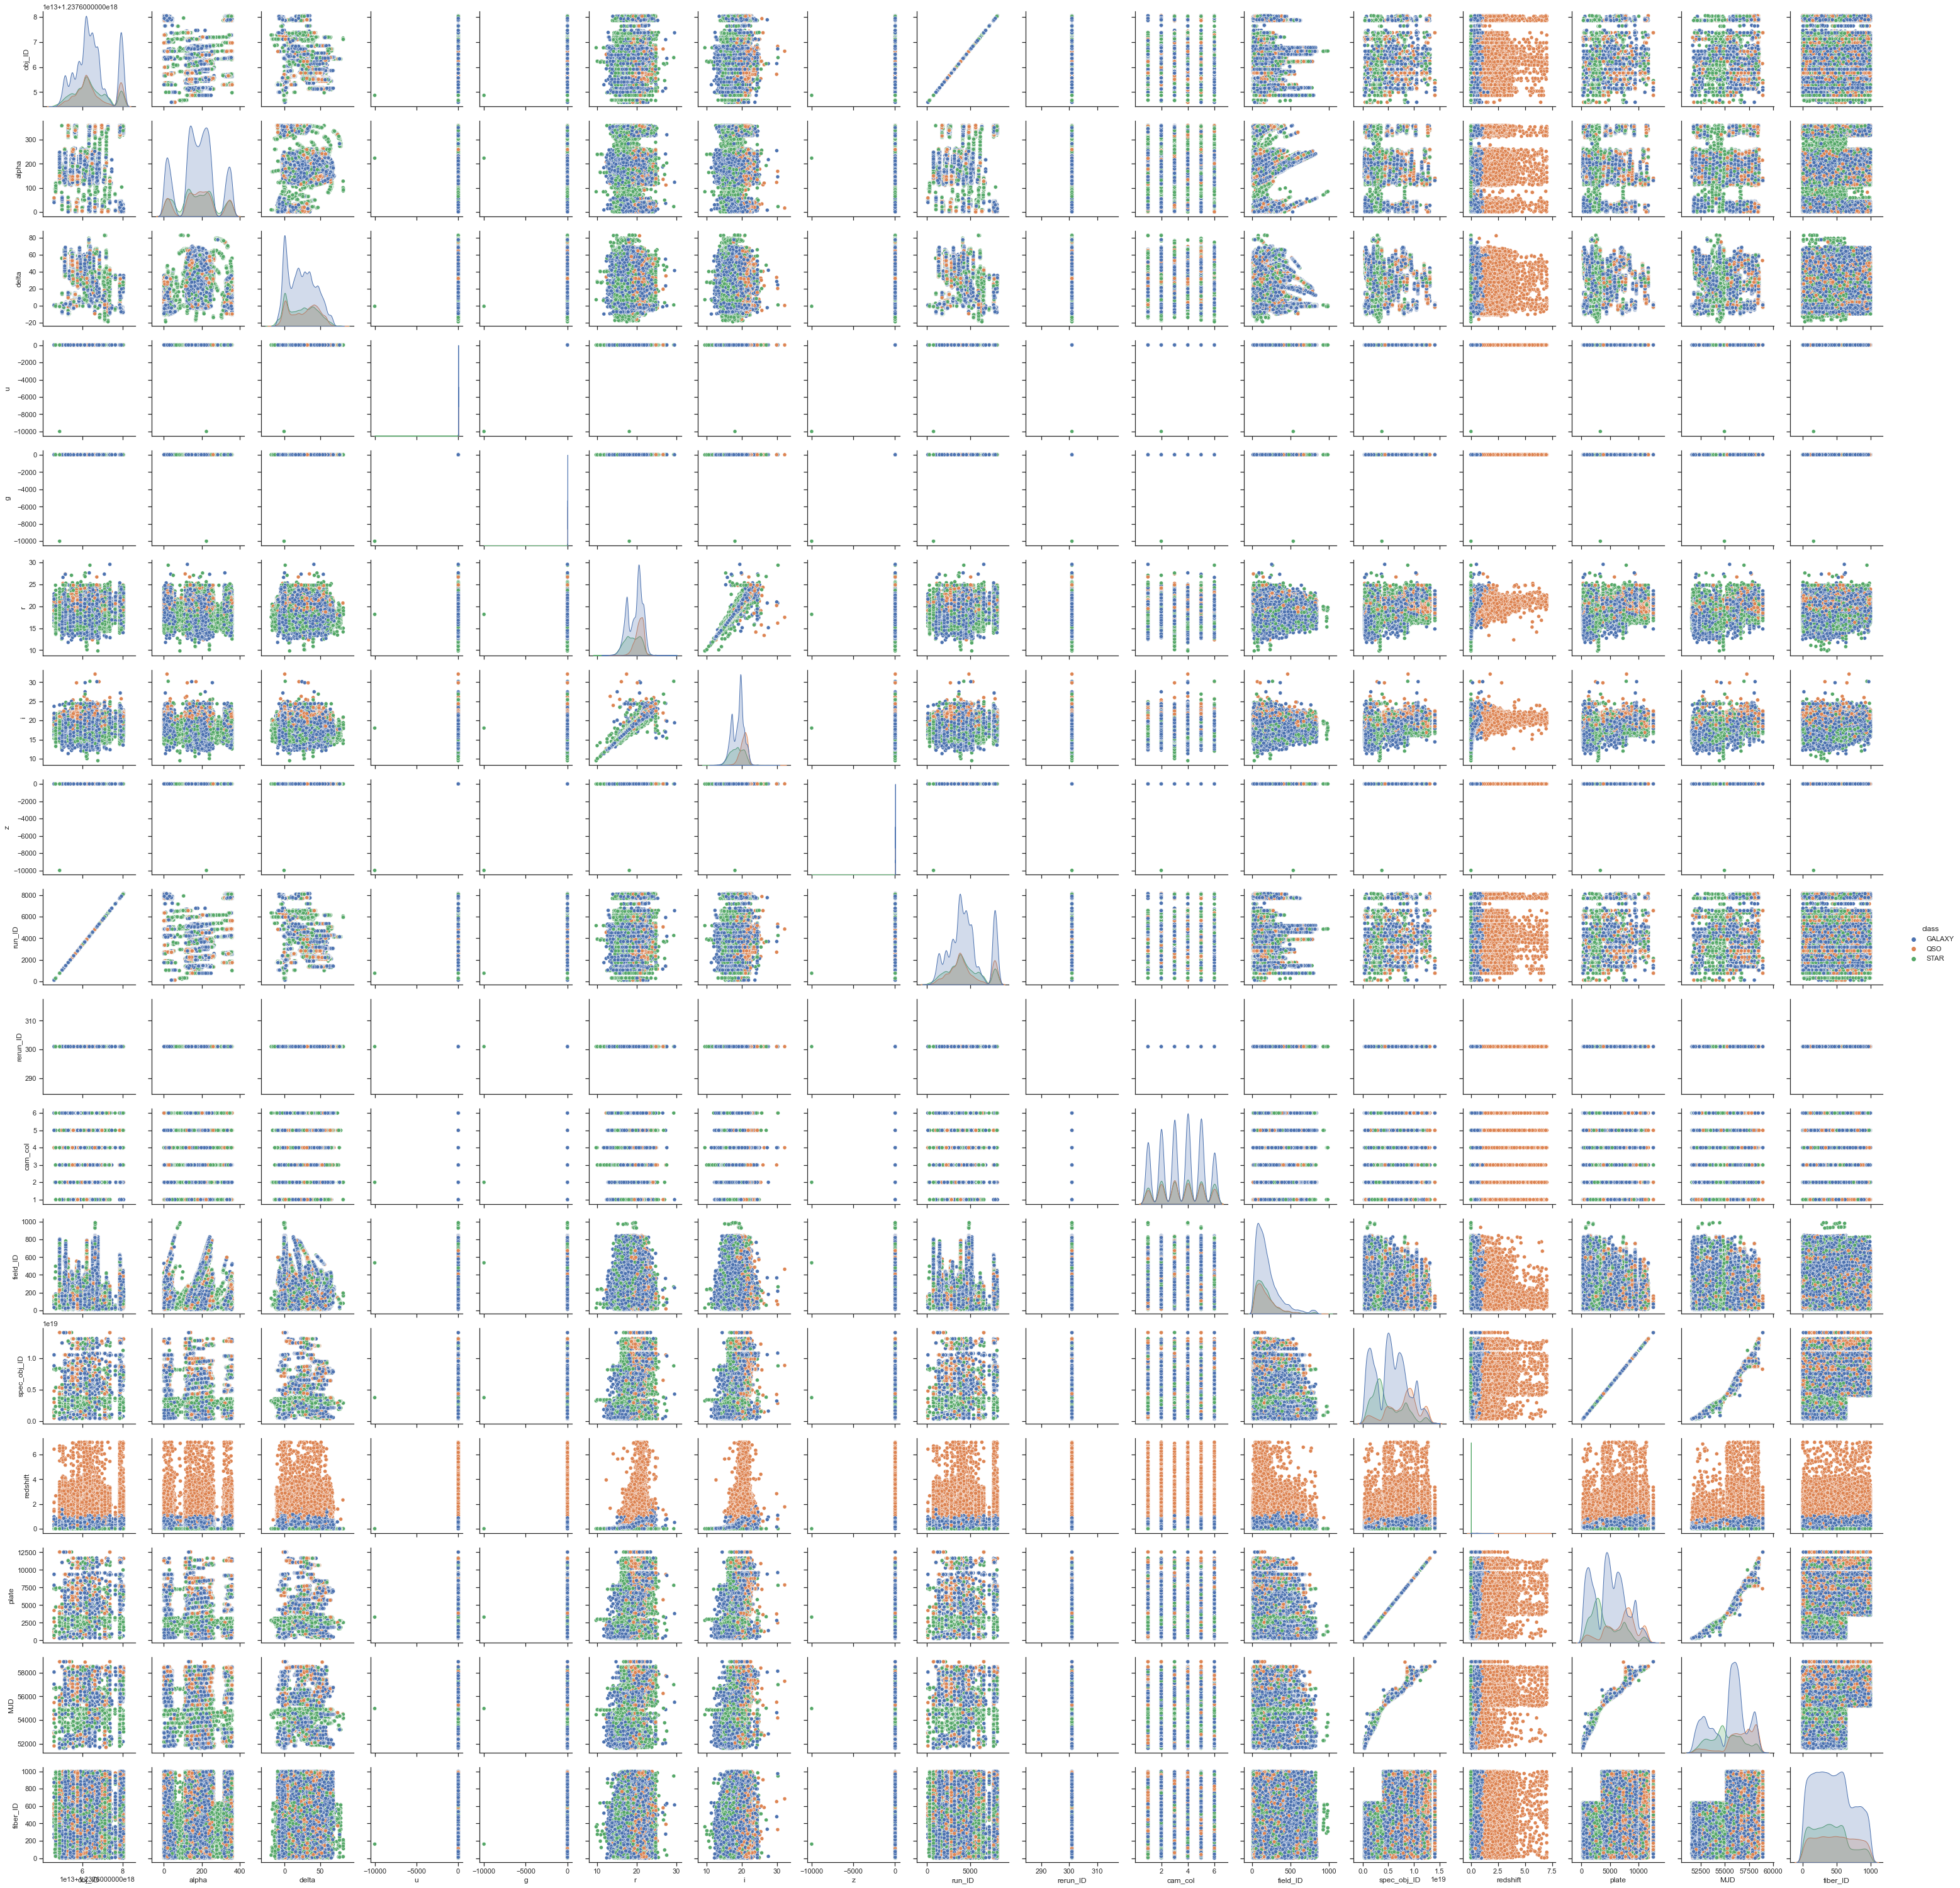

In [29]:
plt.figure(figsize=(8, 8))
sns.pairplot(data_resample, hue ="class")
plt.plot()
[]
plt.savefig("output.jpg")

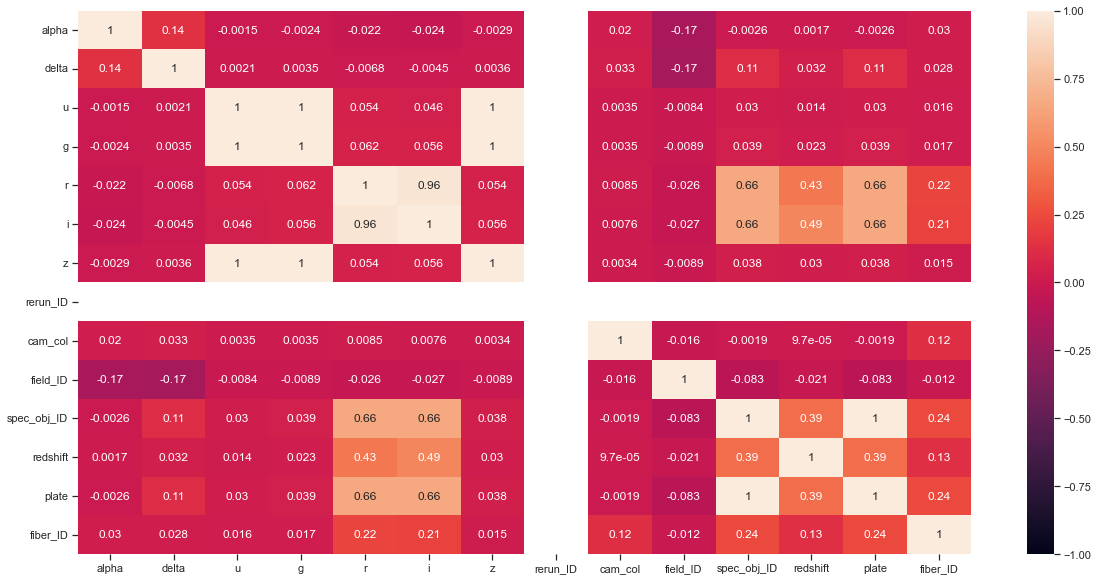

In [13]:
plt.figure(figsize = (20,10))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

In [50]:
data_resample.describe()

u              g              r              i  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       18.637915      17.407128      16.881676      16.625534   
std         0.832284       0.985921       1.133337       1.209532   
min        10.611810       9.668339       9.005167       8.848403   
25%        18.212902      16.852982      16.196607      15.865275   
50%        18.873250      17.515860      16.890640      16.599885   
75%        19.273302      18.056060      17.585750      17.344912   
max        19.599950      19.996050      31.990100      32.141470   

                   z       redshift  
count  100000.000000  100000.000000  
mean       16.467087       0.170621  
std         1.281788       0.437571  
min         8.947795      -0.004136  
25%        15.619960       0.000001  
50%        16.428385       0.045997  
75%        17.234625       0.095429  
max        29.383740       7.011245

In [21]:
X = data_resample.drop(['class'], axis=1).values
y = data_resample['class'].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 100000
Total # of sample in train dataset: 60000
Total # of sample in validation dataset: 20000
Total # of sample in test dataset: 20000


In [23]:
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
models = {
    'RandomForestClassifier': RandomForestClassifier(n_estimators=300, max_features='log2'),
    'Neural Nets': MLPClassifier(alpha=1e-5,  max_iter=400, random_state=23, hidden_layer_sizes=(150,125,100,75), activation = 'relu', solver='adam'),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(solver='liblinear'),
    'SupportVectorMachine': SVC()
}

modelNames = ['RandomForestClassifier', 'Neural Nets', 'DecisionTreeClassifier', 'LogisticRegression', 'SupportVectorMachine']
trainScores = []
validationScores = []
testScores = []
accuracy = []
precision = []
recall = []
f1score = []
specificity = []
for m in models:
    model = models[m]
    model.fit(X_train, y_train)
    score = model.score(X_valid, y_valid)    
    print(f'{m}') 
    train_score = model.score(X_train, y_train)
    print(f'Train score of trained model: {train_score*100}')
    trainScores.append(train_score*100)
    validation_score = model.score(X_valid, y_valid)
    print(f'Validation score of trained model: {validation_score*100}')
    validationScores.append(validation_score*100)
    test_score = model.score(X_test, y_test)
    print(f'Test score of trained model: {test_score*100}')
    testScores.append(test_score*100)
    print(" ")
    y_predictions = model.predict(X_test)
    conf_matrix = confusion_matrix(y_predictions, y_test)
    print(f'Confussion Matrix: \n{conf_matrix}\n')
    predictions = model.predict(X_test)
    cm = confusion_matrix(predictions, y_test)
    tn = conf_matrix[0,0]
    fp = conf_matrix[0,1]
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    accuracy1  = (tp + tn) / (tp + fp + tn + fn)
    accuracy.append(accuracy1)
    precision1 = tp / (tp + fp)
    precision.append(precision1)
    recall1    = tp / (tp + fn)
    recall.append(recall1)
    f1score1  = 2 * precision1 * recall1 / (precision1 + recall1)
    f1score.append(f1score1)
    specificity1 = tn / (tn + fp)
    specificity.append(specificity1)
    print(f'Accuracy : {accuracy1}')
    print(f'Precision: {precision1}')
    print(f'Recall   : {recall1}')
    print(f'F1 score : {f1score1}')
    print(f'Specificity : {specificity1}')
    print("") 
    print(f'Classification Report: \n{classification_report(predictions, y_test)}\n')
    print("")
   
    for m in range (1):
        current = modelNames[m]
        modelNames.remove(modelNames[m])

    preds = model.predict(X_test)
    confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
    print("############################################################################")
    print("")
    print("")
    print("")

RandomForestClassifier
Train score of trained model: 100.0
Validation score of trained model: 54.675
Test score of trained model: 99.11999999999999
 
Confussion Matrix: 
[[10160   111    10]
 [   39  2023     0]
 [   15     1  7641]]

Accuracy : 0.9878375091218682
Precision: 0.9479850046860356
Recall   : 0.981086323957323
F1 score : 0.9642516682554815
Specificity : 0.9891928731379612

Classification Report: 
              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99     10281
         QSO       0.95      0.98      0.96      2062
        STAR       1.00      1.00      1.00      7657

    accuracy                           0.99     20000
   macro avg       0.98      0.99      0.98     20000
weighted avg       0.99      0.99      0.99     20000



############################################################################



Neural Nets
Train score of trained model: 98.48
Validation score of trained model: 40.245
Test score of trained model: 98.035

In [26]:
modelNames = ['RandomForestClassifier', 'Neural Nets', 'DecisionTreeClassifier', 'LogisticRegression', 'SupportVectorMachine']
result = pd.DataFrame(list(zip(modelNames, trainScores, validationScores, testScores, accuracy, precision, recall, f1score, specificity)), columns =['model', 'trainScores', 'validationScores', 'testScores', 'accuracy', 'precision', 'recall', 'f1score', 'specificity'])

In [27]:
result.reset_index(drop=True, inplace=True)
result


model  trainScores  validationScores  testScores  \
0  RandomForestClassifier   100.000000            59.225      97.515   
1             Neural Nets    98.995000            21.495      95.820   
2  DecisionTreeClassifier   100.000000            23.240      96.465   
3      LogisticRegression    93.355000            59.225      93.310   
4    SupportVectorMachine    96.241667            21.495      96.020   

   accuracy  precision    recall   f1score  specificity  
0  0.974151   0.925916  0.965152  0.945127     0.976849  
1  0.968035   0.929890  0.936910  0.933387     0.977812  
2  0.957248   0.912543  0.909139  0.910838     0.972456  
3  0.959041   0.906585  0.923643  0.915034     0.970145  
4  0.970174   0.906484  0.968508  0.936471     0.970662

In [28]:
result.to_csv('result.csv', index=False)